# 🌟 **GROUP FINAL PROJECT - GROUP 2** 🌟


# ✨ ***Data Processing File*** ✨

***`File này chúng em sẽ tập trung vào quy trình xử lí dữ liệu chính cũng như trực quan hoá`***


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker 

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)

df = pd.read_csv("/Users/macbook/Documents/Kì 1 Năm 3/Visualization/ProjectFinal/AmesHousing.csv")
nhom_1 = df.copy()
nhom_2 = df.copy()
nhom_3 = df.copy()
B = df.copy()
df_raw = df.copy()
df_clean = df.copy()
df_insight = df.copy()  

# **A, Feature Removal**

***`Tổng hợp toàn bộ các Feature đã bị loại bỏ trong toàn bộ quy trình phân tích xử lí dữ liệu của dự án`***

In [2]:
cols_to_drop = ['Order', 'PID', #ID columns
                'Pool QC', 'Misc Feature','Alley', 'Fence', 'Fireplace Qu', 'Mas Vrn Type', #High missing values
                '3Ssn Porch', 'Mo Sold', 'Pool Area', 'BsmtFin SF 2', 'Misc Val', 'Bsmt Half Bath', 'Overall Cond', 'Low Qual Fin SF', 'Yr Sold', 'MS SubClass', #Low correlation
                'Garage Area', 'TotRms AbvGrd' # Multicollinear with 'Gr Liv Area'
                ] 
# Tổng cộng xoá 20 biến
df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

**Các nhóm biến và lí do bị loại bỏ:**

* **Nhóm 1:** `Order`, `PID` Loại bỏ dựa theo bản chất của feature, đây là các feature định danh không mang ý nghĩa dự đoán

* **Nhóm 2:** `Pool QC`, `Misc Feature`, `Alley`, `Fence`, `Fireplace Qu`, `Mas Vrn Type` Đây là nhóm các feature chúng em quyết định loại bỏ dựa theo tiêu chí Missing Value cao ngất ngưởng lên đến trên 50%

* **Nhóm 3:** `3Ssn Porch`, `Mo Sold`, `Pool Area`, `BsmtFin SF 2`, `Misc Val`, `Bsmt Half Bath`, `Overall Cond`, `Low Qual Fin SF`, `Yr Sold`, `MS SubClass` Đây là nhóm các Feature chúng em quyết định loại bỏ dựa theo tiêu chí tương quan thấp đối với biến mục tiêu, thể hiện rằng các feature này không mang ý nghĩa thống kê cũng như ý nghĩa dự đoán

* **Nhóm 4:** `Garage Area`, `TotRms AbvGrd` Đây là nhóm các Feature chúng em quyết định loại bỏ dựa theo tiêu chí tương quan cao, dễ gây đa cộng tuyến


**`Dưới đây là phân tích chi tiết cho từng nhóm biến`**

## ***Nhóm 1***

**`Order` và `PID` là 2 biến định danh, điều này được thể hiện qua việc số lượng giá trị duy nhất của cả 'Order' và 'PID' đều bằng tổng số hàng ($2930$)**

In [3]:
counts = nhom_1[['Order','PID']].value_counts()
print(counts)

Order  PID      
1      526301100    1
1947   535375130    1
1949   535378080    1
1950   535379060    1
1951   535379110    1
                   ..
979    923228150    1
980    923228230    1
981    923230200    1
982    923252075    1
2930   924151050    1
Name: count, Length: 2930, dtype: int64


## ***Nhóm 2***

**Nhóm các biến gồm `Pool QC`, `Misc Feature`, `Alley`, `Fence`, `Fireplace Qu` bị buộc phải loại bỏ vì tỉ lệ missing value quá cao**


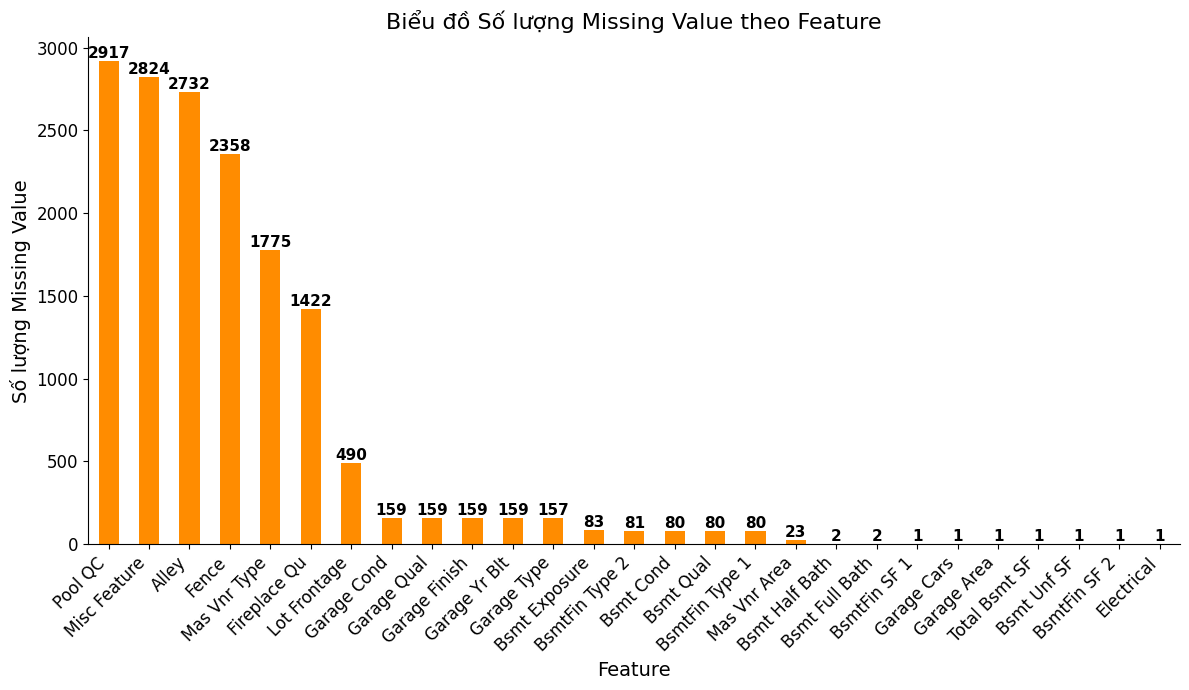

In [4]:
missing_counts = nhom_2.isnull().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)

if missing_counts.empty:
    print("Không có giá trị thiếu (missing values) nào trong dữ liệu để vẽ biểu đồ.")
else:
    plt.figure(figsize=(12, 7))
    ax = plt.gca() 
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    missing_counts.plot(kind='bar', color='darkorange')

    plt.title('Biểu đồ Số lượng Missing Value theo Feature', fontsize=16)
    plt.xlabel('Feature', fontsize=14)
    plt.ylabel('Số lượng Missing Value', fontsize=14)
    
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    
    for i, count in enumerate(missing_counts):
        plt.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=11, fontweight='bold')
    plt.tight_layout()


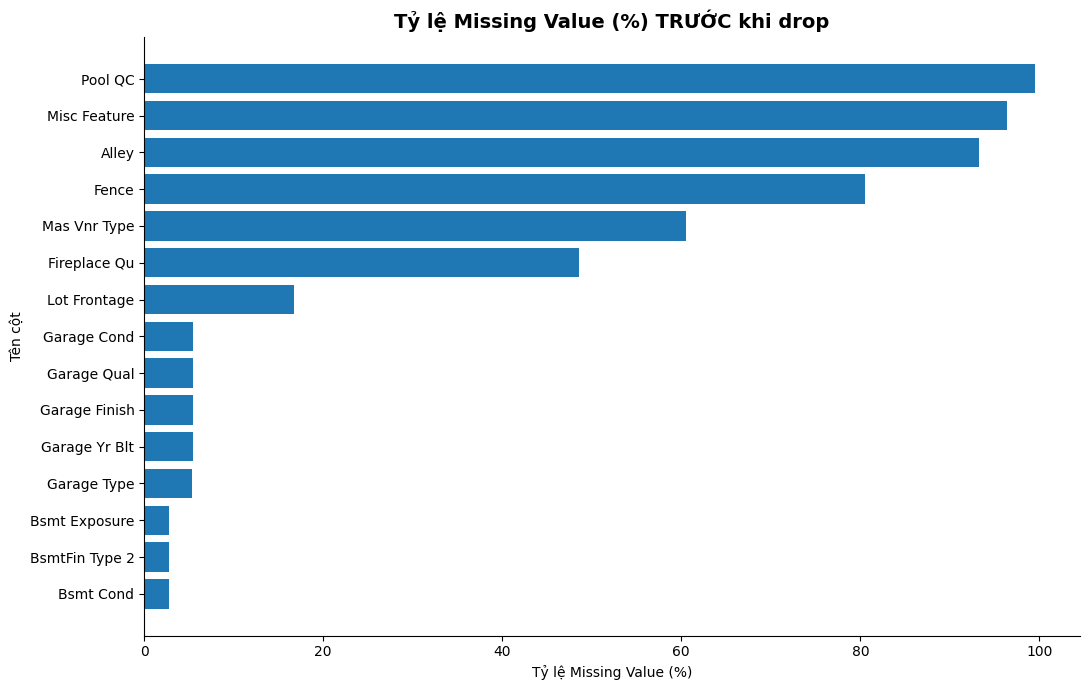

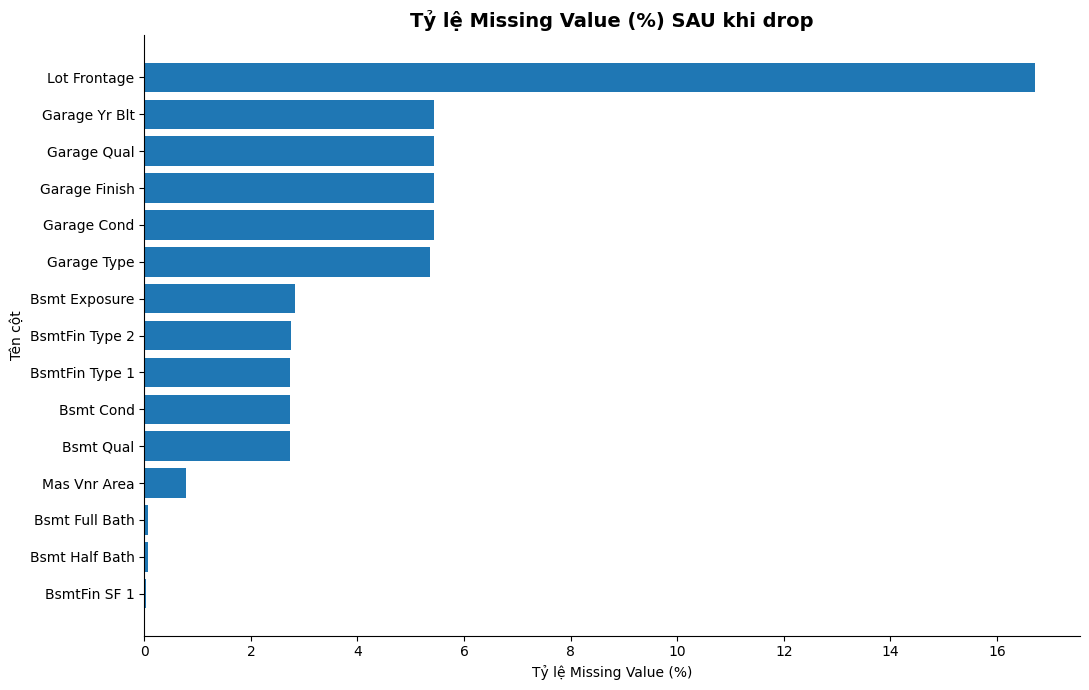

In [5]:
def plot_missing_ratio(df, title, topn=15):
    miss_ratio = (df.isna().mean() * 100).round(2)
    miss_ratio = miss_ratio[miss_ratio > 0].sort_values(ascending=False).head(topn)

    plt.figure(figsize=(11,7))
    ax = plt.gca() #
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.barh(miss_ratio.index[::-1], miss_ratio.values[::-1])  # đảo để cột lớn ở trên
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel('Tỷ lệ Missing Value (%)')
    plt.ylabel('Tên cột')
    plt.tight_layout()
    plt.show()

cols_to_drop = ['Pool QC', 'Misc Feature','Alley', 'Fence', 'Fireplace Qu', 'Mas Vnr Type']
nhom_2_cleaned = nhom_2.drop(columns=[c for c in cols_to_drop if c in nhom_2.columns])
# 4) Vẽ 2 biểu đồ tách rời
plot_missing_ratio(nhom_2,  'Tỷ lệ Missing Value (%) TRƯỚC khi drop', topn=15)
plot_missing_ratio(nhom_2_cleaned,'Tỷ lệ Missing Value (%) SAU khi drop',   topn=15)


## ***Nhóm 3***

**Nhóm các biến `3Ssn Porch`, `Mo Sold`, `Pool Area`, `BsmtFin SF 2`, `Misc Val`, `Bsmt Half Bath`, `Overall Cond`, `Low Qual Fin SF`, `Yr Sold`, `MS SubClass` bị loại bỏ dựa theo tương quan thấp đối với biến mục tiêu (< 0.05)**

In [6]:
indices_to_drop = [1498, 2180, 2181, 746, 1258, 426, 1497, 2260]
nhom_3 = nhom_3.drop(index=indices_to_drop, axis=0)

nhom_3 = nhom_3[nhom_3['Gr Liv Area'] < 4000]
y_raw = nhom_3['SalePrice']

y_log = np.log1p(nhom_3['SalePrice']) 

cols_to_drop = ['Order', 'PID', 'Pool QC', 'Misc Feature','Alley', 'Fence', 'Fireplace Qu'] 
nhom_3 = nhom_3.drop(columns=[c for c in cols_to_drop if c in nhom_3.columns])

nhom_3['TotalSF'] = nhom_3['Total Bsmt SF'] + nhom_3['1st Flr SF'] + nhom_3['2nd Flr SF']

X_train, X_test, y_train_log, y_test_log = train_test_split(nhom_3, y_log, test_size=0.3, random_state=42)

train_analysis = X_train.copy()
train_analysis['SalePrice'] = y_train_log
corr_matrix = train_analysis.corr(method="pearson", numeric_only=True)

target_var = 'SalePrice'
corr_with_target = corr_matrix[target_var].sort_values(ascending=False)
corr_with_target = corr_with_target.drop(target_var)

/var/folders/dm/fk87zbb17nzb594pksfvrc4c0000gn/T/ipykernel_17828/496753027.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette='vlag')


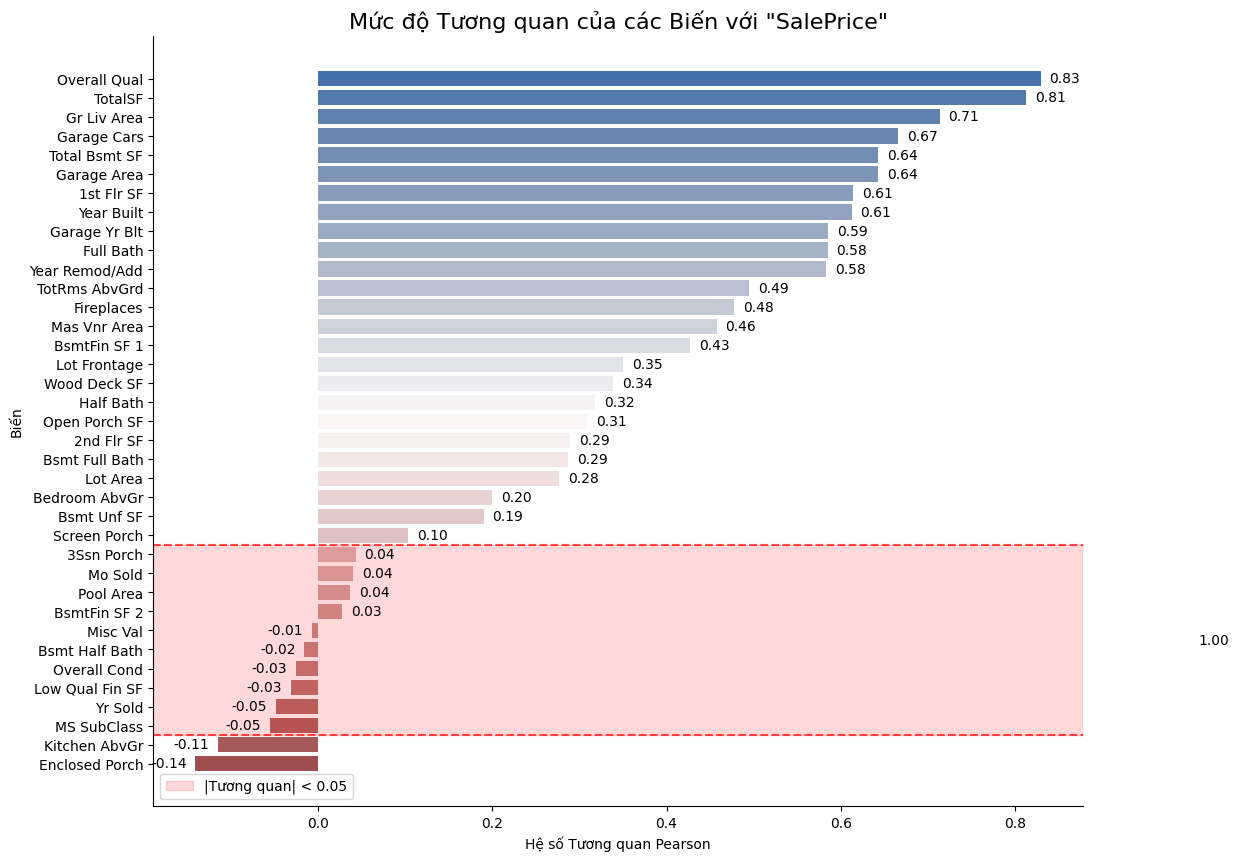

In [7]:
plt.figure(figsize=(12, 10))
ax = plt.gca() 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax = sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette='vlag')
target_var = 'SalePrice'
plt.title(f'Mức độ Tương quan của các Biến với "{target_var}"', fontsize=16)
plt.xlabel('Hệ số Tương quan Pearson')
plt.ylabel('Biến')


weak_corr_vars = corr_with_target[np.abs(corr_with_target.values) < 0.06].index

if not weak_corr_vars.empty:
    all_vars_in_plot_order = corr_with_target.index.tolist()
    
    # Vị trí của biến đầu tiên có tương quan yếu 
    first_weak_var_index = all_vars_in_plot_order.index(weak_corr_vars[0])
    
    last_weak_var_index = all_vars_in_plot_order.index(weak_corr_vars[-1])
    y_start = last_weak_var_index + 0.5  # Vị trí thấp nhất (dưới cùng của thanh cuối)
    y_end = first_weak_var_index - 0.5 # Vị trí cao nhất (trên cùng của thanh đầu)
    
    ax.axhspan(ymin=y_end, ymax=y_start, color='red', alpha=0.15, label='|Tương quan| < 0.05')
    ax.axhline(y=y_end, color='red', linestyle='--', linewidth=1.5, alpha=0.7)
    ax.axhline(y=y_start, color='red', linestyle='--', linewidth=1.5, alpha=0.7)

for p in ax.patches:
    width = p.get_width()
    y = p.get_y() + p.get_height() / 2
    if width > 0:
        x = width + 0.01
        ha = 'left'
    else:
        x = width - 0.01
        ha = 'right'
    ax.text(
        x=x,                 
        y=y,                 
        s=f'{width:.2f}',    
        ha=ha,               
        va='center',         
        fontsize=10
    )

ax.legend(loc='lower left') 
plt.show()

## ***Nhóm 4***

**2 biến`Garage Area`, `TotRms AbvGrd` bị loại dựa theo tương quan cao của chúng với một biến khác, dễ gây đa cộng tuyến**

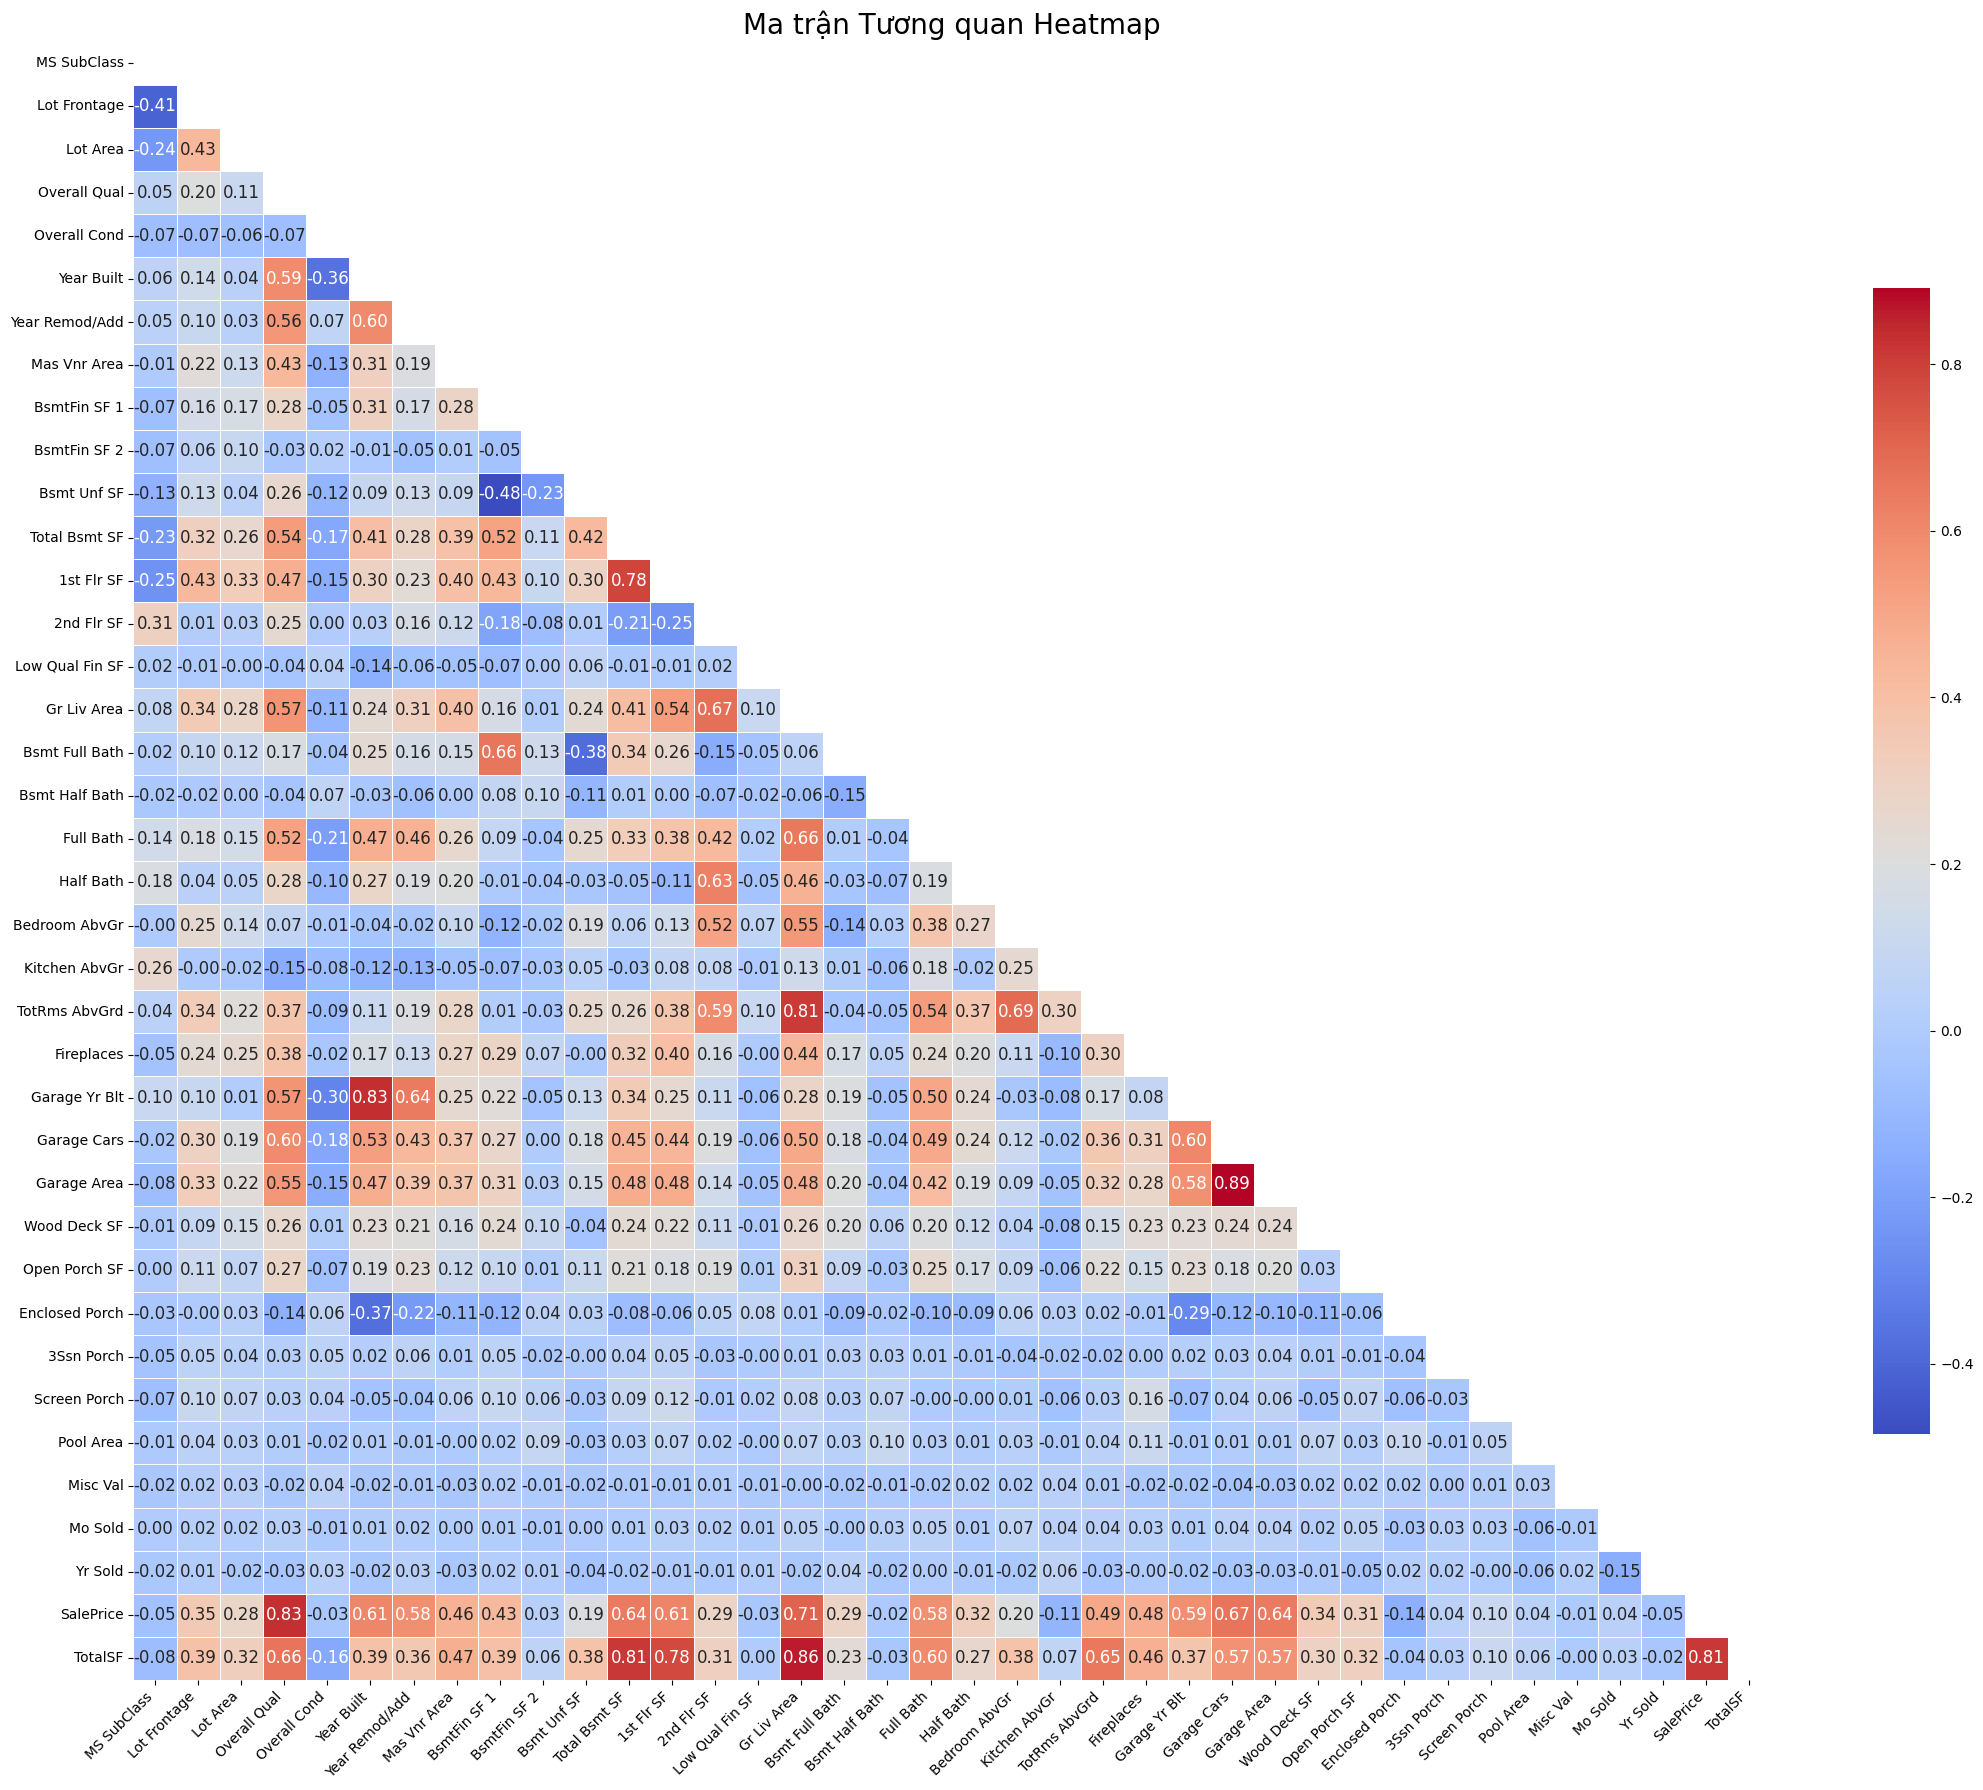

In [8]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(22, 18)) 
sns.heatmap(
    corr_matrix, 
    mask=mask,              
    cmap='coolwarm',
    annot=True,              
    fmt='.2f',              
    annot_kws={"size": 12},         
    linewidths=.5,
    cbar_kws={"shrink": .7}  
)
plt.title('Ma trận Tương quan Heatmap', fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

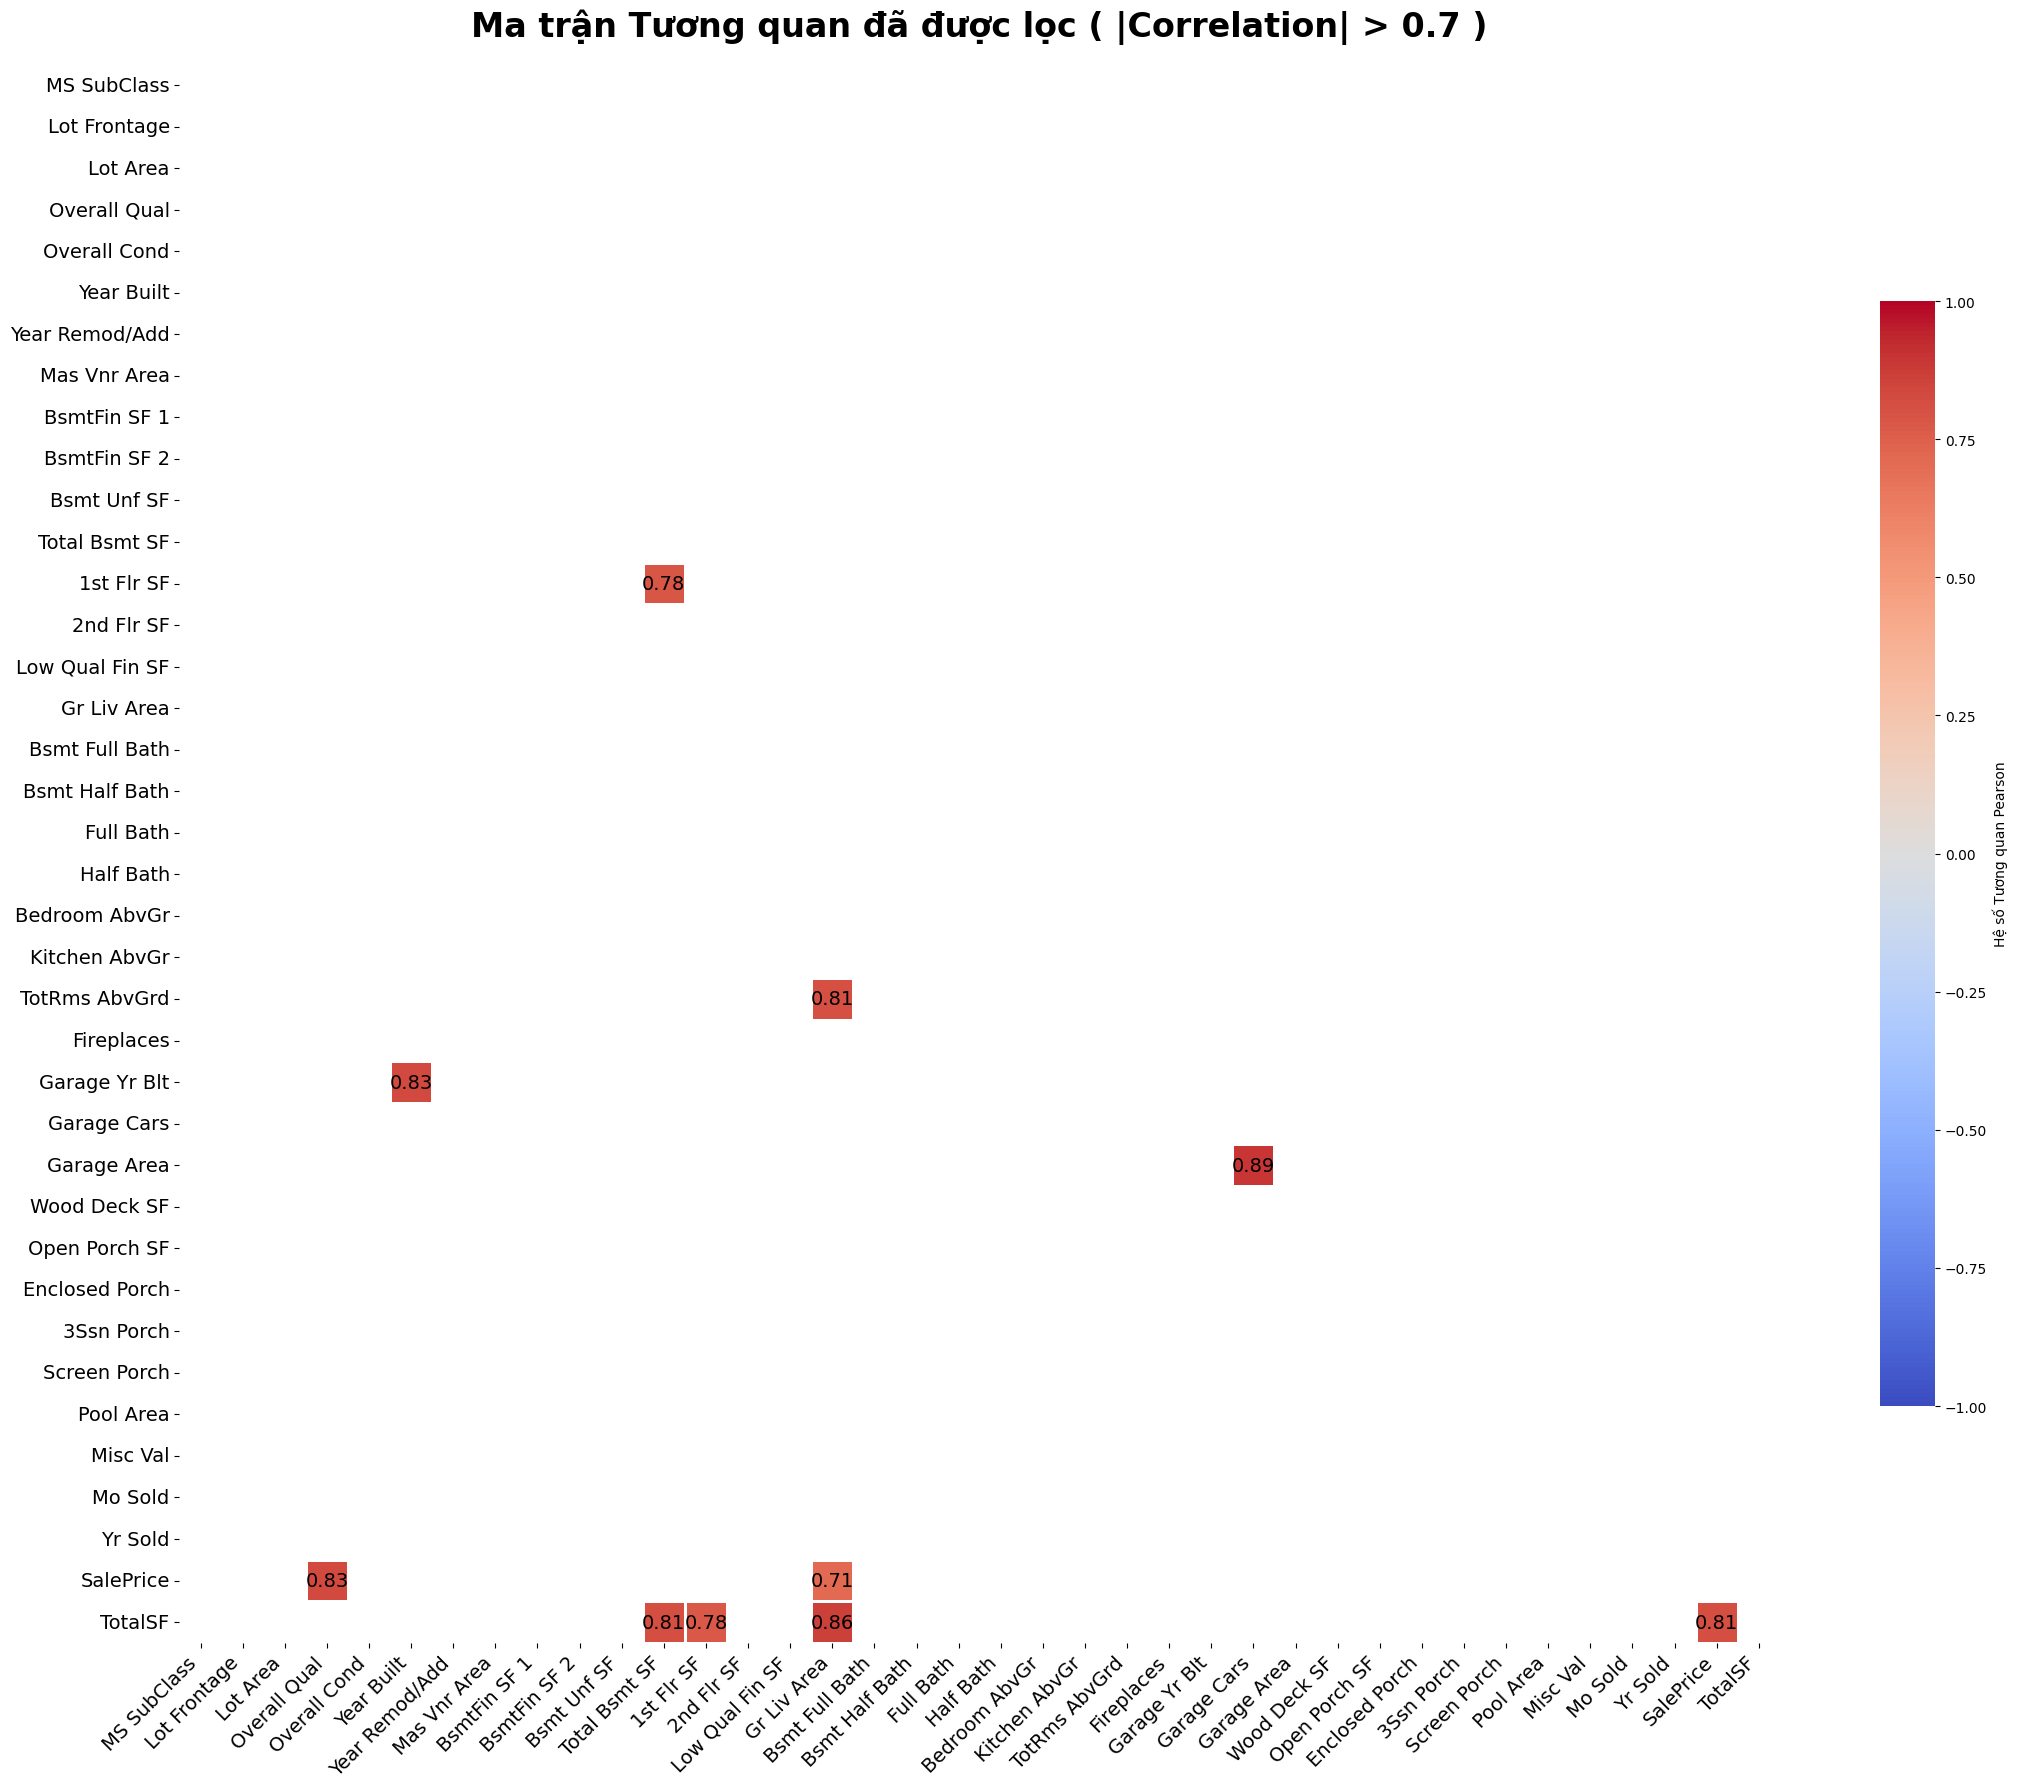

In [9]:
mask_triu = np.triu(np.ones_like(corr_matrix, dtype=bool))
corr_filtered = corr_matrix.copy()
mask_weak_corr = (np.abs(corr_filtered) <= 0.7)
final_mask = mask_triu | mask_weak_corr
plt.figure(figsize=(22, 18)) 
sns.heatmap(
    corr_matrix, 
    mask=final_mask,          # Sử dụng mask đã lọc
    cmap='coolwarm',           
    vmin=-1.0,                
    vmax=1.0,                
    annot=True,              
    fmt='.2f',               
    annot_kws={
        "size": 14, 
        "color": 'black'     
    },         
    linewidths=0.8,           
    linecolor='white',       
    cbar_kws={
        "shrink": .7, 
        "label": 'Hệ số Tương quan Pearson'
    }  
)
plt.title(
    'Ma trận Tương quan đã được lọc ( |Correlation| > 0.7 )', 
    fontsize=24, 
    fontweight='bold', 
    pad=20
)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(rotation=0, fontsize=14)
plt.tight_layout()
plt.show()

# **B, Outliers Handling**

**`Ở phần này, chúng em quyết định sẽ lọc Outlier ở các Feature có tương quan cao nhất đối với biến mục tiêu, bởi những biến này sẽ gây ảnh hưởng mạnh nhất đối với biến mục tiêu vậy nên việc xử lí Outlier ở những biến này sẽ giúp cải thiện mô hình và tăng độ chính xác của nó. Đây là bước ngoặt của dự án chúng em`**

**Sau khi có được top các biến có tương quan cao nhất đối với biến mục tiêu, chúng em sử dụng thủ pháp chọn ra các điểm quantile 99% để loại bỏ Outlier ở những biến này. Dưới đây là tổng hợp các outlier đã loại bỏ ở từng biến(Được thể hiện bằng ID của dòng chứa outlier đó)**

In [10]:
indices_to_drop = [1498, 2180, 2181, 746, 1258, 426, 1497, 2260]
df = df.drop(index=indices_to_drop, axis=0)
df = df[df['Gr Liv Area'] < 4000]

**Các tên biến cũng như index hàng chứa outlier của biến đó và lí do bị loại bỏ:**

* **`Gr Liv Area`:** 1498(trùng), 2180(trùng), 2181

* **`Garage Cars`:** 746

* **`Total Bsmt SF`:** 1498(trùng), 2180(trùng)

* **`Garage Area`:** 1258, 1498(trùng), 426

* **`1st Flr SF`:** 1498(trùng), 2180(trùng), 1497

* **`Garage Yr Blt`:** 2260


### Điểm cực đoan (Outliers) của 'Gr Liv Area' (Ngưỡng cắt: 4000.00):
      Order  Gr Liv Area  SalePrice
1498   1499         5642     160000
2180   2181         5095     183850
2181   2182         4676     184750
--------------------------------------------------------------------------------
### Điểm cực đoan (Outliers) của 'Garage Cars' (Ngưỡng cắt: 4.00):
     Order  Garage Cars  SalePrice
746    747          5.0     126500
--------------------------------------------------------------------------------
### Điểm cực đoan (Outliers) của 'Total Bsmt SF' (Ngưỡng cắt: 3000.00):
      Order  Total Bsmt SF  SalePrice
1498   1499         6110.0     160000
2180   2181         5095.0     183850
2181   2182         3138.0     184750
--------------------------------------------------------------------------------
### Điểm cực đoan (Outliers) của 'Garage Area' (Ngưỡng cắt: 1358.45):
      Order  Garage Area  SalePrice
1258   1259       1488.0     139000
1498   1499       1418.0     160000
426 

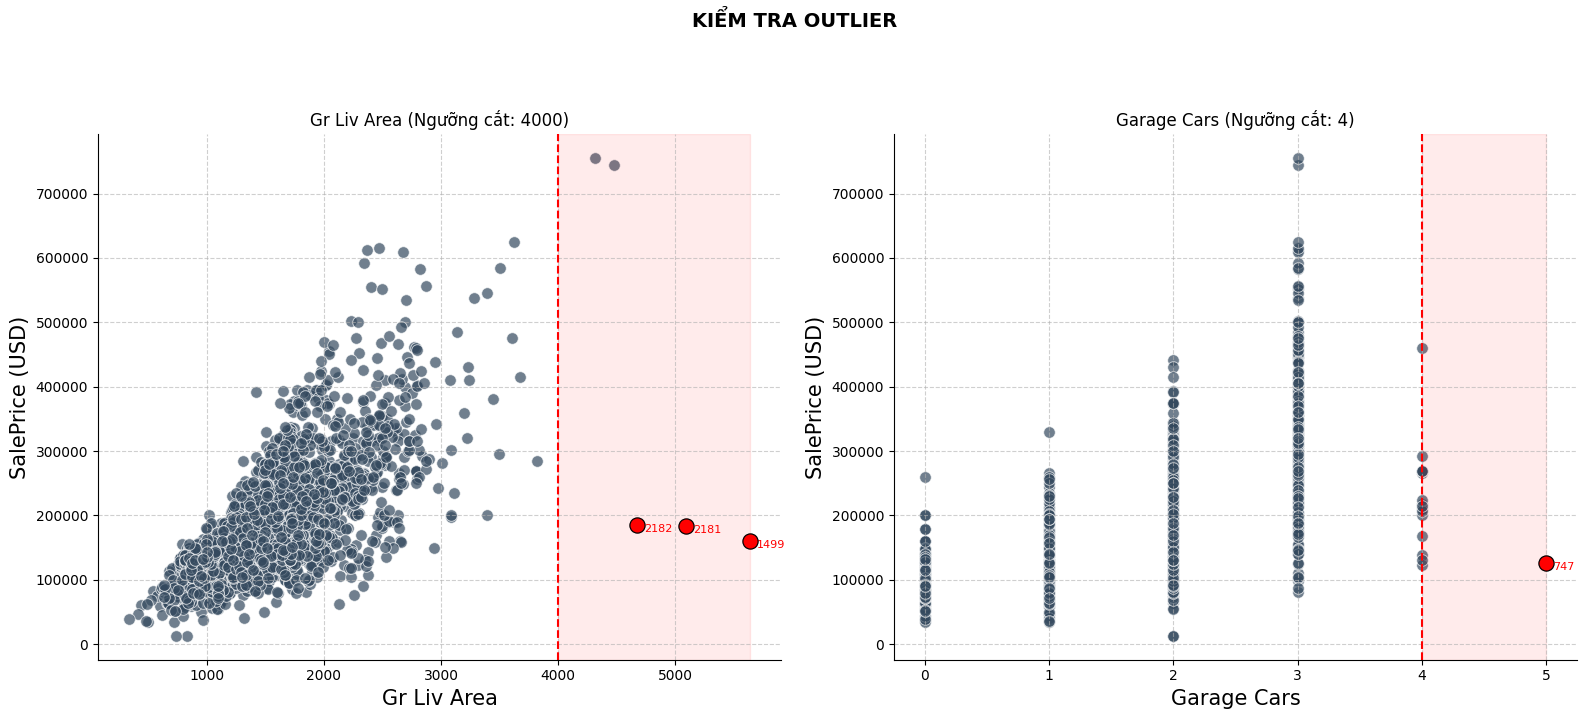

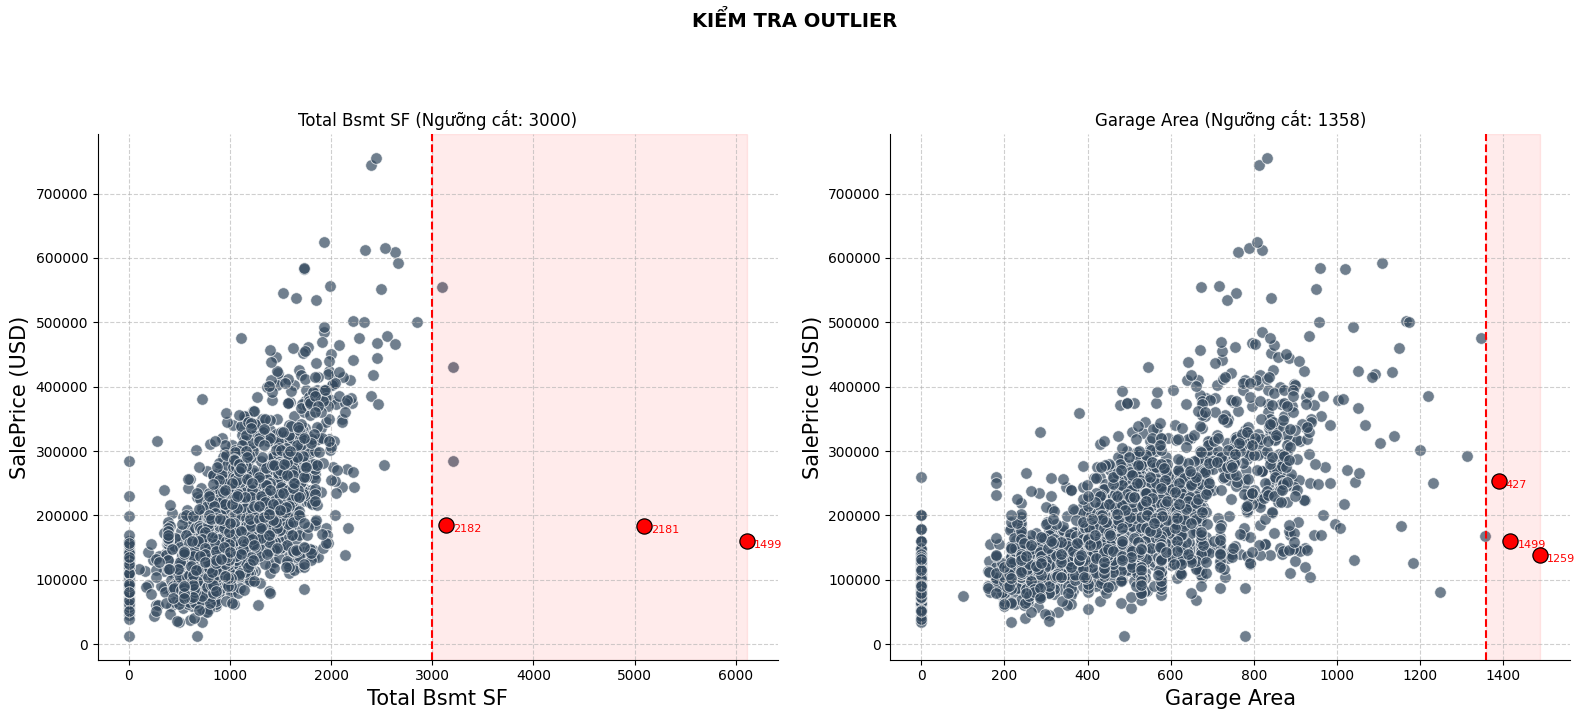

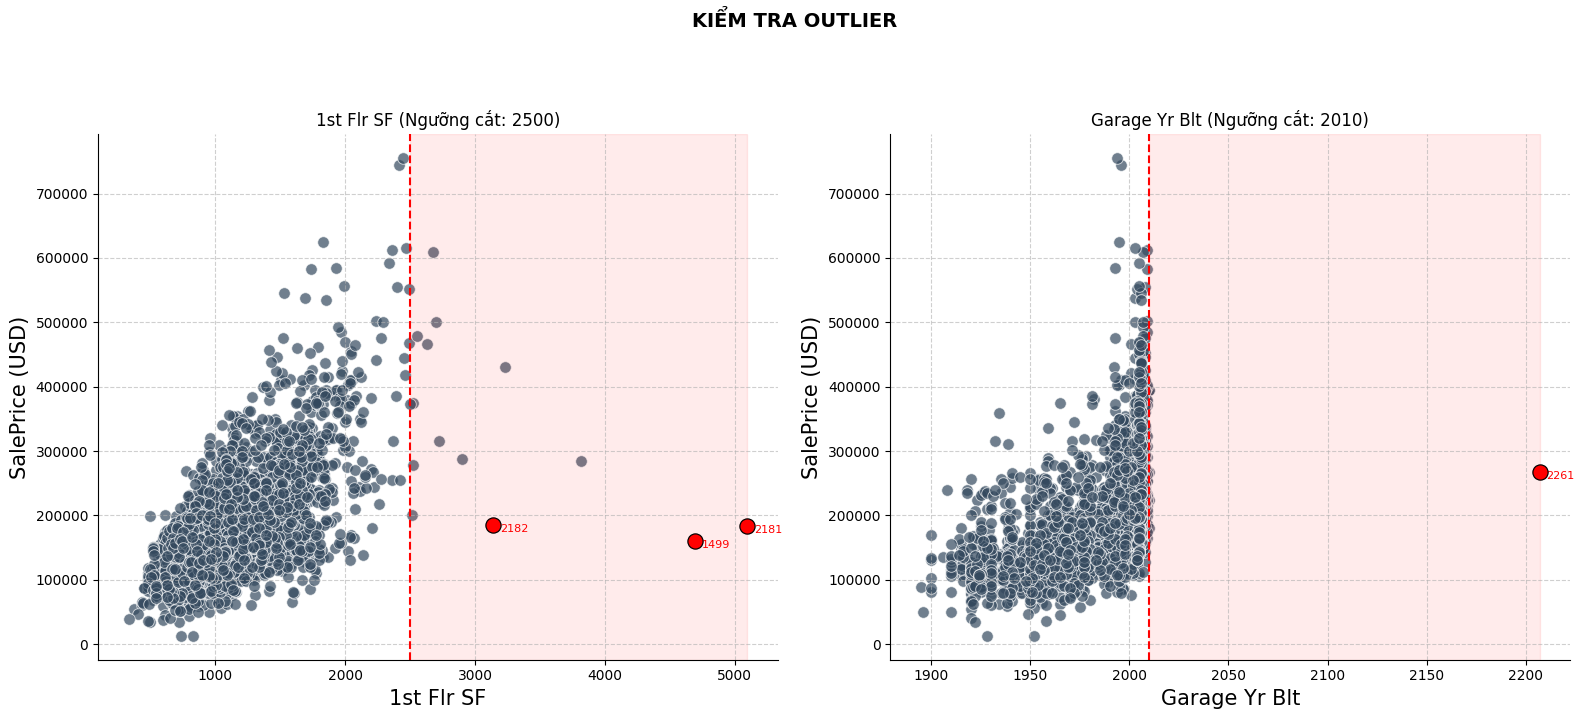

In [11]:
features_to_check = [
    'Gr Liv Area', 'Garage Cars', 'Total Bsmt SF', 'Garage Area', '1st Flr SF', 'Garage Yr Blt'
]

# 📌 TỰ ĐẶT NGƯỠNG CẮT CHO TỪNG FEATURE
CUSTOM_THRESHOLDS = {
    'Gr Liv Area': 4000,     
    'Total Bsmt SF': 3000,   
    'Garage Cars': 4,        
    '1st Flr SF': 2500      
}


# 1. Tính trước xem feature nào có outlier
outlier_info = {}

for feature in features_to_check:
    
    # Lấy ngưỡng: Ưu tiên giá trị tự đặt, nếu không có thì dùng quantile 0.999
    if feature in CUSTOM_THRESHOLDS:
        extreme_value = CUSTOM_THRESHOLDS[feature]
    else:
        extreme_value = B[feature].quantile(0.999) 
        
    # Lọc các điểm cực đoan
    outliers_to_note = (
        B[B[feature] > extreme_value]
        .sort_values(by='SalePrice')
    )

    if not outliers_to_note.empty:
        if len(outliers_to_note) > 3:
            outliers_to_note = outliers_to_note.iloc[:3]
             
        outlier_info[feature] = {
            "thresh": extreme_value,
            "df": outliers_to_note
        }

        print(f"### Điểm cực đoan (Outliers) của '{feature}' (Ngưỡng cắt: {extreme_value:.2f}):")
        display_cols = ['Order', feature, 'SalePrice']
        print(outliers_to_note[display_cols].to_string())
        print("-" * 80)

if not outlier_info:
    print("❌ Không có feature nào có outlier với các ngưỡng đã đặt.")
else:
    # 2. Vẽ chỉ những feature có outlier (Vẽ hai lớp scatterplot)
    feature_list = list(outlier_info.keys())
    n_features = len(feature_list)
    
    FEATURES_PER_ROW = 2
    feature_chunks = [
        feature_list[i:i + FEATURES_PER_ROW] 
        for i in range(0, n_features, FEATURES_PER_ROW)
    ]
    
    for chunk_idx, current_features in enumerate(feature_chunks):
        n_cols = len(current_features)
        n_rows = 1 

        fig, axes = plt.subplots(n_rows, n_cols, figsize=(8 * n_cols, 7)) 
        axes = np.atleast_1d(axes).ravel() 
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        fig.suptitle(f'KIỂM TRA OUTLIER',
                    y=1.02, fontsize=14, fontweight='bold')
        
        for idx, feature in enumerate(current_features):
            info = outlier_info[feature]
            ax = axes[idx]
            
            # 2a. scatter toàn bộ điểm (Màu xám mặc định)
            sns.scatterplot(
                x=feature,
                y='SalePrice',
                data=B,
                ax=ax,
                s=70,
                alpha=0.7,
                color='#34495e' # Đặt màu xám đậm cho các điểm bình thường
            )
            
            # 2b. VẼ LỚP THỨ HAI: Lọc và vẽ các điểm outlier lên trên (Màu đỏ)
            outliers_to_note = info["df"]
            sns.scatterplot(
                x=feature,
                y='SalePrice',
                data=outliers_to_note,
                ax=ax,
                s=120, # Kích thước lớn hơn để nổi bật
                alpha=1,
                color='red', # Màu đỏ cho outlier
                edgecolor='black', # Thêm viền đen
                zorder=10 # Đảm bảo lớp outlier nằm trên cùng
            )

            # đường đỏ ngưỡng outlier
            thresh = info["thresh"]
            ax.axvline(thresh, color='red', linestyle='--', linewidth=1.5)
            # tô vùng bên phải ngưỡng (vùng bị cắt)
            ax.axvspan(thresh, B[feature].max(),
                    color='red', alpha=0.08)

            # annotate ID của outlier (Giữ nguyên)
            for k in range(len(outliers_to_note)):
                ax.annotate(
                f"{outliers_to_note['Order'].iloc[k]}",
                (outliers_to_note[feature].iloc[k], outliers_to_note['SalePrice'].iloc[k]),
                textcoords="offset points", 
                xytext=(5, -5),              
                ha='left',                   
                fontsize=8,                  
                color='red'                  
            )
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.set_title(f"{feature} (Ngưỡng cắt: {thresh:.0f})", fontsize=12)
            ax.set_xlabel(feature, fontsize=15)
            ax.set_ylabel('SalePrice (USD)', fontsize=15)
            ax.grid(True, linestyle='--', alpha=0.6)

        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

# **C, Feature Engineering**

## **Feature Creation**

**`Phần này chúng em tập trung vào sự biến đổi của các Feature`**

**Dựa vào domain knowledge nên chúng em quyết định kết hợp bộ 3 biến diện tích (TotalSF) , diện tích sàn (TotalBsmtSF) và diện tích phòng ngủ (GrLivArea) để tạo ra một biến diện tích tổng thể (TotalAreaSF).**

In [12]:
df['TotalSF'] = df['Total Bsmt SF'] + df['1st Flr SF'] + df['2nd Flr SF']

**Kết quả của mô hình được cải thiện nhẹ sau khi chúng em tạo thêm biến này**

## **Log Transformation Target Variable**

**Việc sử dụng mô hình $Linear Regression$ khiến mô hình của chúng em cần phải đảm bảo biến mục tiêu cần đạt phân phối chuẩn. Nhận thấy biến mục tiêu $SalePrice$ không đạt phân phối chuẩn, do đó chúng em cần phải biến đổi biến này để đạt được phân phối chuẩn bằng $Log Transformation$. Kết quả của mô hình bọn em kiểm nghiệm cũng đã cải thiện rõ rệt và có bước đột phá cực lớn**

In [13]:
y_log = np.log1p(df['SalePrice'])

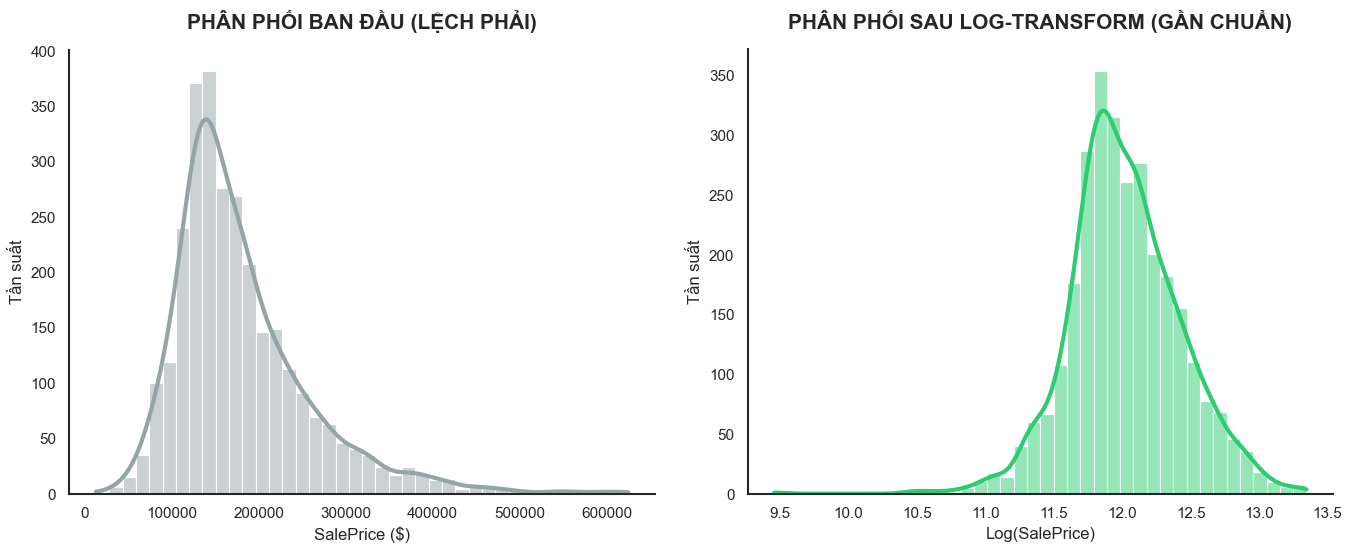

In [14]:
sns.set_theme(style="white")
plt.figure(figsize=(14, 6)) 

## Trước khi log-transform
plt.subplot(1, 2, 1)
ax1 = plt.gca()
ax1.grid(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_linewidth(1.5) 
ax1.spines['left'].set_linewidth(1.5)   

sns.histplot(
    y_raw, 
    kde=True, 
    bins=40, 
    color='#95a5a6', 
    line_kws={'linewidth': 3, 'color': '#95a5a6'} 
)
plt.title('PHÂN PHỐI BAN ĐẦU (LỆCH PHẢI)', fontsize=15, fontweight='bold', pad=15)
plt.xlabel('SalePrice ($)', fontsize=12)
plt.ylabel('Tần suất', fontsize=12)



## Sau khi log-transform
plt.subplot(1, 2, 2)
ax2 = plt.gca() 
ax2.grid(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_linewidth(1.5) # Làm đậm trục X
ax2.spines['left'].set_linewidth(1.5)   # Làm đậm trục Y

sns.histplot(
    y_log, 
    kde=True, 
    bins=40, 
    color='#2ecc71', 
    line_kws={'linewidth': 3, 'color': '#2ecc71'} 
)
plt.title('PHÂN PHỐI SAU LOG-TRANSFORM (GẦN CHUẨN)', fontsize=15, fontweight='bold', pad=15)
plt.xlabel('Log(SalePrice)', fontsize=12)
plt.ylabel('Tần suất', fontsize=12)
plt.tight_layout(pad=2)
plt.show()

Text(0, 0.5, 'Tần suất')

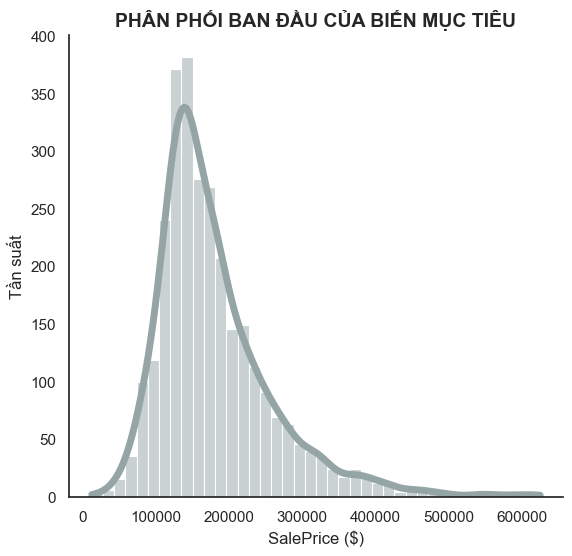

In [15]:
sns.set_theme(style="white") 
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
ax = plt.gca()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(False) 

sns.histplot(
    y_raw, 
    kde=True, 
    bins=40, 
    color='#95a5a6', 
    line_kws={'linewidth': 5, 'color': '#c0392b'} 
)
plt.title('PHÂN PHỐI BAN ĐẦU CỦA BIẾN MỤC TIÊU', fontsize=14, fontweight='bold')
plt.xlabel('SalePrice ($)')
plt.ylabel('Tần suất')

# **D, Model Training**

**`Quy trình huấn luyện mô hình dựa trên nền tảng các bước Data Prepprocessing trước đó`**

In [16]:
y_raw = df['SalePrice'] # Lấy biến mục tiêu ban đầu

y_log = np.log1p(df['SalePrice']) # Log-transform biến mục tiêu

X_train, X_test, y_train_log, y_test_log = train_test_split(df, y_log, test_size=0.3, random_state=42) # Chia dữ liệu thành train và test

numeric_cols_of_X_train = X_train.select_dtypes(include=[np.number]).columns.tolist() # Lấy danh sách các cột số
categorical_cols_of_X_train = X_train.select_dtypes(include=['object']).columns.tolist() # Lấy danh sách các cột phân loại

In [17]:

numeric_transformer = Pipeline(steps=[ # Tạo pipeline cho các cột số
    ('imputer', SimpleImputer(strategy='median')), 
    ('scaler', StandardScaler())                   
])

categorical_transformer = Pipeline(steps=[ # Tạo pipeline cho các cột phân loại
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')), 
    ('encoder', OneHotEncoder(handle_unknown='ignore')) 
])

preprocessor = ColumnTransformer( # Tạo preprocessor để xử lý các cột số và phân loại
    transformers=[
        ('num', numeric_transformer, numeric_cols_of_X_train),
        ('cat', categorical_transformer, categorical_cols_of_X_train)
    ])

model_pipeline = Pipeline(steps=[ # Tạo pipeline mô hình
    ('preprocessor', preprocessor),
    ('feature_selection', SelectPercentile(f_regression, percentile=50)), 
    ('regressor', LinearRegression())
])

model_pipeline.fit(X_train, y_train_log) # Huấn luyện mô hình trên tập huấn luyện
y_pred_log = model_pipeline.predict(X_test) # Dự đoán trên tập kiểm tra
y_pred_raw = np.expm1(y_pred_log) # Chuyển đổi dự đoán về miền giá trị ban đầu
y_test_raw = y_raw.loc[y_test_log.index] # Lấy giá trị mục tiêu thực tế tương ứng với tập kiểm tra


# **E, Model Evaluation**

**`Kết quả mô hình sau khi được xử lí`**

In [18]:
rmse_dollar = np.sqrt(mean_squared_error(y_test_raw, y_pred_raw)) # Tính RMSE trên giá trị thực
mae_dollar = mean_absolute_error(y_test_raw, y_pred_raw) # Tính MAE trên giá trị thực
r2 = r2_score(y_test_raw, y_pred_raw) # Tính R2 Score trên giá trị thực

print(f"Linear Regression - Real RMSE: ${rmse_dollar:,.2f}")
print(f"Linear Regression - Real MAE: ${mae_dollar:,.2f}")
print(f"Linear Regression - R2 Score: {r2:.4f}")

Linear Regression - Real RMSE: $22,775.76
Linear Regression - Real MAE: $9,640.36
Linear Regression - R2 Score: 0.9098


**`Biểu đồ thể hiện sự so sánh giữa giá trị thực tế và giá trị dự báo. Cũng như phân phối phần dư`**

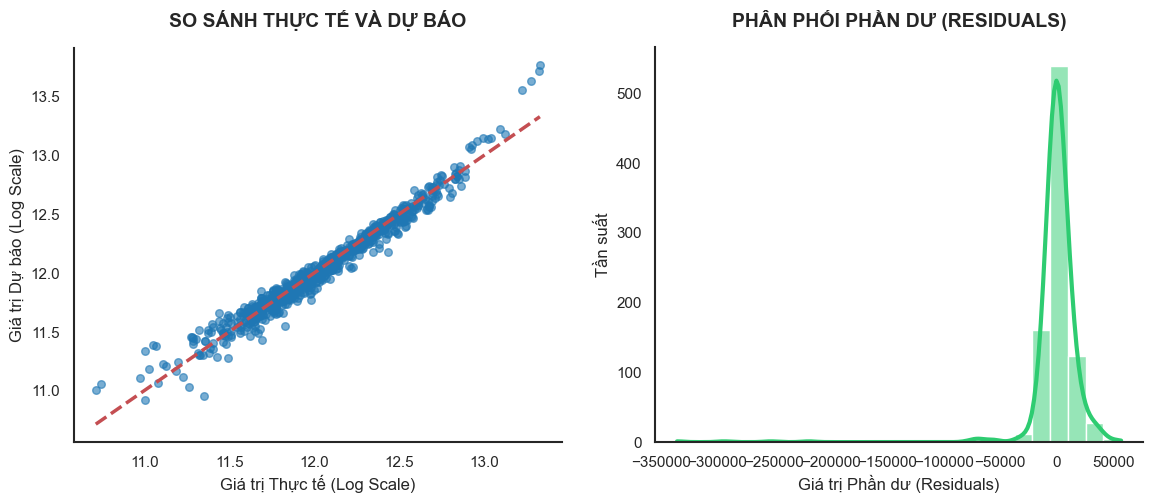

In [19]:
sns.set_theme(style="white")
plt.figure(figsize=(12, 5.5)) 
plt.subplot(1, 2, 1)
ax1 = plt.gca()

ax1.grid(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_linewidth(1.5) # Làm đậm trục X
ax1.spines['left'].set_linewidth(1.5)   # Làm đậm trục Y
plt.scatter(
    y_test_log, 
    y_pred_log, 
    alpha=0.6, 
    s=30, #
    color='#1f77b4' 
)

plt.plot(
    [y_test_log.min(), y_test_log.max()], 
    [y_test_log.min(), y_test_log.max()], 
    'r--', 
    lw=2.5 
)

plt.xlabel('Giá trị Thực tế (Log Scale)', fontsize=12)
plt.ylabel('Giá trị Dự báo (Log Scale)', fontsize=12)
plt.title(
    'SO SÁNH THỰC TẾ VÀ DỰ BÁO', 
    fontsize=14, 
    fontweight='bold', 
    pad=15, 
    loc='center'
)


plt.subplot(1, 2, 2)
ax2 = plt.gca()

ax2.grid(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_linewidth(1.5)
ax2.spines['left'].set_linewidth(1.5)
residuals = y_test_raw - y_pred_raw # Tính phần dư (Residuals)
sns.histplot(
    residuals, 
    kde=True,
    bins=25, 
    color='#2ecc71', 
    edgecolor='white', 
    line_kws={'linewidth': 3, 'color': '#27ae60'} 
)
plt.xlabel('Giá trị Phần dư (Residuals)', fontsize=12)
plt.ylabel('Tần suất', fontsize=12)
plt.title(
    'PHÂN PHỐI PHẦN DƯ (RESIDUALS)', 
    fontsize=14, 
    fontweight='bold', 
    pad=15, 
    loc='center'
)

plt.tight_layout(pad=2) 
plt.show()

# **F, Model Evaluation Before and After Cleaning**

**`Code 2 hàm so sánh hiệu suất mô hình trước và sau khi xử lí dữ liệu`**

In [20]:
def raw_approach(df):
    # Chỉ lấy số, điền 0 vào chỗ trống
    df_raw = df.select_dtypes(include=[np.number]).copy()
    df_raw = df_raw.fillna(0) 
    
    X = df_raw.drop(['SalePrice', 'Order', 'PID'], axis=1, errors='ignore')
    y = df_raw['SalePrice']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    return r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))

raw_r2, raw_mae, raw_rmse = raw_approach(df_raw)

def expert_approach(df):
    df_clean = df.copy()
    cols_to_drop = ['Order', 'PID', #ID columns
                'Pool QC', 'Misc Feature','Alley', 'Fence', 'Fireplace Qu', 'Mas Vrn Type', #High missing values
                '3Ssn Porch', 'Mo Sold', 'Pool Area', 'BsmtFin SF 2', 'Misc Val', 'Bsmt Half Bath', 'Overall Cond', 'Low Qual Fin SF', 'Yr Sold', 'MS SubClass', #Low correlation
                'Garage Area', 'TotRms AbvGrd' # Multicollinear with 'Gr Liv Area'
                ] 
    # Tổng cộng xoá 18 biến
    df_clean = df_clean.drop(columns=[c for c in cols_to_drop if c in df_clean.columns])
    
    # 1. Loại bỏ Outlier (Quan trọng!)
    indices_to_drop = [1498, 2180, 2181, 746, 1258, 426, 1497, 2260]
    df_clean = df_clean.drop(index=indices_to_drop, axis=0)
    df_clean = df_clean[df_clean['Gr Liv Area'] < 4000]
    
    df_clean['TotalSF'] = df_clean['Total Bsmt SF'] + df_clean['1st Flr SF'] + df_clean['2nd Flr SF']
    y_log = np.log1p(df_clean['SalePrice']) 
    y_raw = df_clean['SalePrice'] 
    y_log = np.log1p(df_clean['SalePrice']) 
    # 3. Tạo đặc trưng mới (Feature Engineering)
    df_clean['TotalSF'] = df_clean['Total Bsmt SF'] + df_clean['1st Flr SF'] + df_clean['2nd Flr SF']
    
    X_train, X_test, y_train_log, y_test_log = train_test_split(df_clean, y_log, test_size=0.3, random_state=42)

    numeric_cols_of_X_train = X_train.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols_of_X_train = X_train.select_dtypes(include=['object']).columns.tolist()
    
    
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')), # Điền missing bằng trung vị
        ('scaler', StandardScaler())                   # Chuẩn hóa
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')), # Điền missing
        ('encoder', OneHotEncoder(handle_unknown='ignore')) # Mã hóa One-hot
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_cols_of_X_train),
            ('cat', categorical_transformer, categorical_cols_of_X_train)
        ])

    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('feature_selection', SelectPercentile(f_regression, percentile=50)), # Giữ lại 50% đặc trưng tốt nhất
        ('regressor', LinearRegression())
    ])

    model_pipeline.fit(X_train, y_train_log)
    y_pred_log = model_pipeline.predict(X_test)
    y_pred_raw = np.expm1(y_pred_log) 
    y_test_raw = y_raw.loc[y_test_log.index]
    
    return r2_score(y_test_raw, y_pred_raw), mean_absolute_error(y_test_raw, y_pred_raw), np.sqrt(mean_squared_error(y_test_raw, y_pred_raw))

clean_r2, clean_mae, clean_rmse = expert_approach(df_clean)

print(f"Kết quả Raw(R²): {raw_r2:.2f}")
print(f"Kết quả Raw (MAE): {raw_mae:.2f}")
print(f"Kết quả Raw (RMSE): {raw_rmse:.2f}")
print(f"Kết quả Clean(R²): {clean_r2:.2f}")
print(f"Kết quả Clean (MAE): {clean_mae:.2f}")
print(f"Kết quả Clean (RMSE): {clean_rmse:.2f}")


Kết quả Raw(R²): 0.85
Kết quả Raw (MAE): 20834.50
Kết quả Raw (RMSE): 32940.98
Kết quả Clean(R²): 0.91
Kết quả Clean (MAE): 9640.36
Kết quả Clean (RMSE): 22775.76


/var/folders/dm/fk87zbb17nzb594pksfvrc4c0000gn/T/ipykernel_17828/3495529108.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Trạng thái', y='R²', data=df, palette=colors)


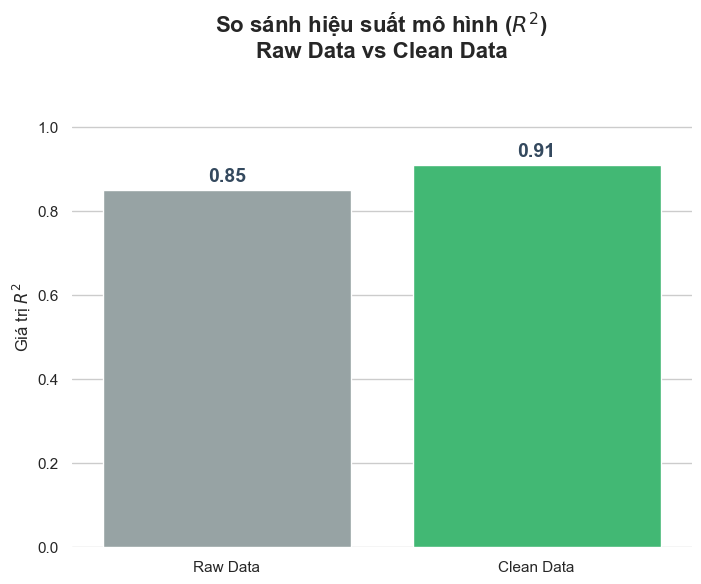

In [26]:
data = {
    'Trạng thái': ['Raw Data', 'Clean Data'],
    'R²': [0.85, 0.91]
}
df = pd.DataFrame(data)
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))

colors = ['#95a5a6', '#2ecc71'] 
ax = sns.barplot(x='Trạng thái', y='R²', data=df, palette=colors)
plt.title('So sánh hiệu suất mô hình ($R^2$)\nRaw Data vs Clean Data', 
        fontsize=16, fontweight='bold', pad=20)

plt.ylabel('Giá trị $R^2$', fontsize=12)
plt.xlabel('')

plt.ylim(0, 1.1)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize=14, fontweight='bold', color='#34495e') 
sns.despine(left=True, bottom=True)
plt.show()

/var/folders/dm/fk87zbb17nzb594pksfvrc4c0000gn/T/ipykernel_17828/840026431.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Trạng thái', y='MAE', data=df, palette=colors)


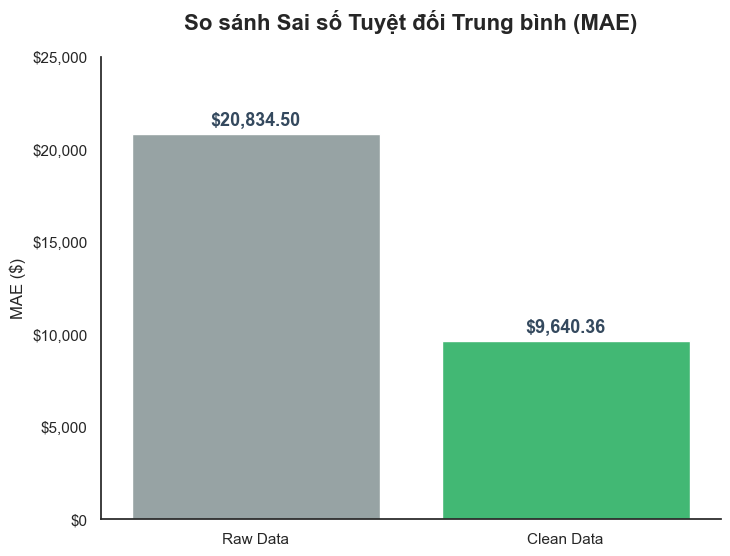

In [22]:
data = {
    'Trạng thái': ['Raw Data', 'Clean Data'],
    'MAE': [20834.50, 9640.36]
}
df = pd.DataFrame(data)

sns.set_theme(style="white") 
plt.figure(figsize=(8, 6))

colors = ['#95a5a6', '#2ecc71'] 

ax = sns.barplot(x='Trạng thái', y='MAE', data=df, palette=colors)

plt.title('So sánh Sai số Tuyệt đối Trung bình (MAE)', 
        fontsize=16, fontweight='bold', pad=20)
plt.ylabel('MAE ($)', fontsize=12) # Đặt lại tên cho trục Y
plt.xlabel('')

plt.ylim(0, 25000)

formatter = ticker.StrMethodFormatter('${x:,.0f}')
ax.yaxis.set_major_formatter(formatter)

for p in ax.patches:
    label = f'${p.get_height():,.2f}'
    ax.annotate(label, 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize=13, fontweight='bold', color='#34495e')

sns.despine(top=True, right=True, left=False)

plt.show()

/var/folders/dm/fk87zbb17nzb594pksfvrc4c0000gn/T/ipykernel_17828/54216821.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Trạng thái', y='RMSE', data=df, palette=colors)


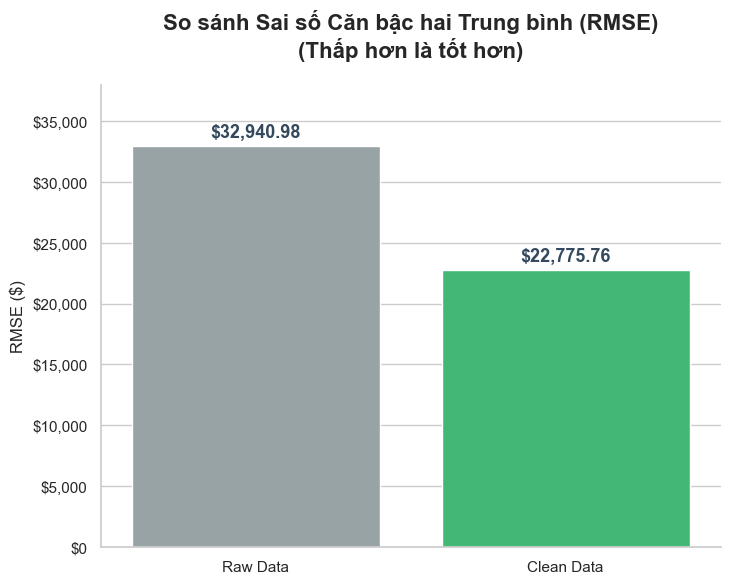

In [23]:
data = {
    'Trạng thái': ['Raw Data', 'Clean Data'],
    'RMSE': [32940.98, 22775.76]
}
df = pd.DataFrame(data)
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))
colors = ['#95a5a6', '#2ecc71']

ax = sns.barplot(x='Trạng thái', y='RMSE', data=df, palette=colors)
plt.title('So sánh Sai số Căn bậc hai Trung bình (RMSE)\n(Thấp hơn là tốt hơn)', 
        fontsize=16, fontweight='bold', pad=20)
plt.ylabel('RMSE ($)', fontsize=12)
plt.xlabel('')

plt.ylim(0, 38000)

formatter = ticker.StrMethodFormatter('${x:,.0f}')
ax.yaxis.set_major_formatter(formatter)
for p in ax.patches:
    label = f'${p.get_height():,.2f}'
    ax.annotate(label, 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize=13, fontweight='bold', color='#34495e')
sns.despine(top=True, right=True, left=False)

plt.show()

/var/folders/dm/fk87zbb17nzb594pksfvrc4c0000gn/T/ipykernel_17828/4167189378.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Trạng thái', y='R²', data=df, palette=colors)


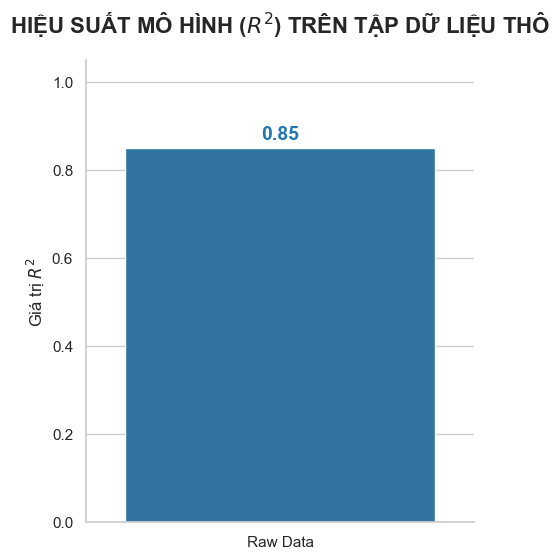

In [24]:
data = {
    'Trạng thái': ['Raw Data'],
    'R²': [0.85]
}
df = pd.DataFrame(data)

sns.set_theme(style="whitegrid") 
plt.figure(figsize=(5, 6)) 

colors = ['#1f77b4'] 

ax = sns.barplot(x='Trạng thái', y='R²', data=df, palette=colors)

plt.title('HIỆU SUẤT MÔ HÌNH ($R^2$) TRÊN TẬP DỮ LIỆU THÔ', 
        fontsize=16, fontweight='bold', pad=20, loc='center') 

plt.ylabel('Giá trị $R^2$', fontsize=12)
plt.xlabel('') 

plt.ylim(0, 1.05) 

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',  
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize=14, fontweight='bold', color='#1f77b4') 

sns.despine(top=True, right=True)
plt.show()

# **G. Insight**

**`Dưới đây là biểu đồ thể hiện một vài insight cũng khá hay mà nhóm chúng em tìm ra được, phần nào làm hấp dẫn câu chuyện`**

/var/folders/dm/fk87zbb17nzb594pksfvrc4c0000gn/T/ipykernel_17828/577511108.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Overall Qual', y='SalePrice', data=df_insight, palette="Blues")


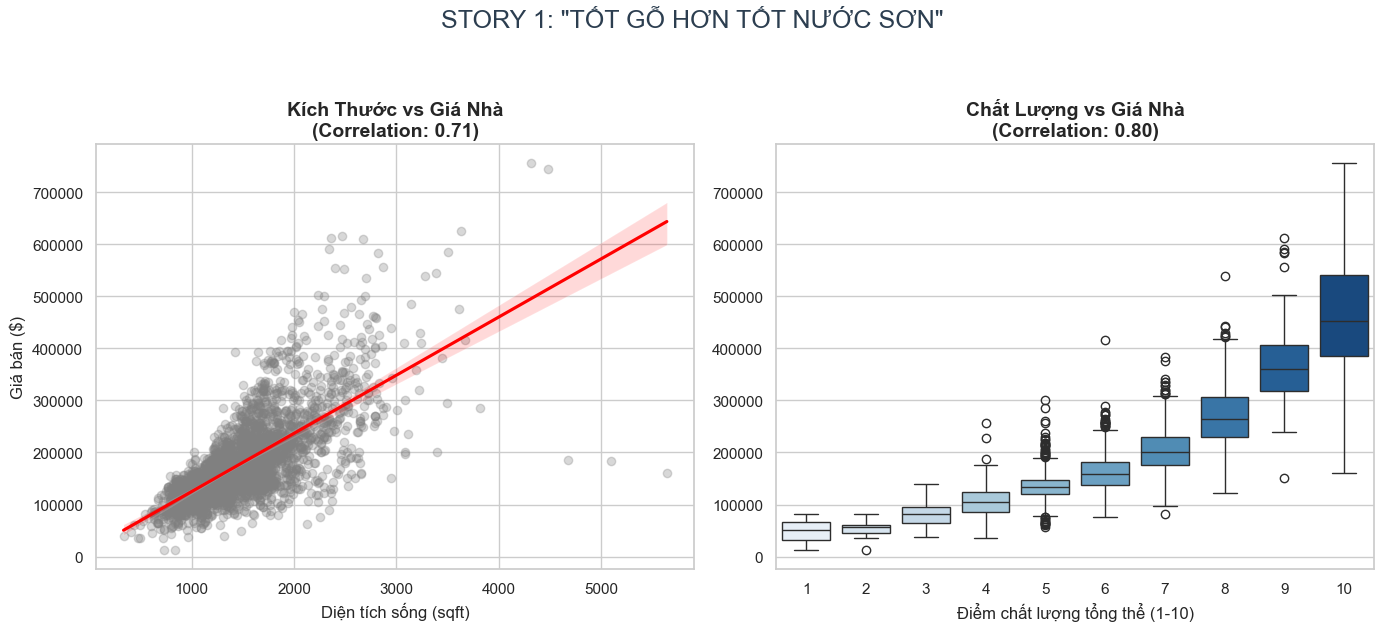

/var/folders/dm/fk87zbb17nzb594pksfvrc4c0000gn/T/ipykernel_17828/577511108.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Fireplaces', y='SalePrice', data=df_insight, estimator=np.median, errorbar=None, palette="Oranges", ax=axes[0])
/var/folders/dm/fk87zbb17nzb594pksfvrc4c0000gn/T/ipykernel_17828/577511108.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Garage Cars', y='SalePrice', data=df_insight, estimator=np.median, errorbar=None, palette="Purples", ax=axes[1])


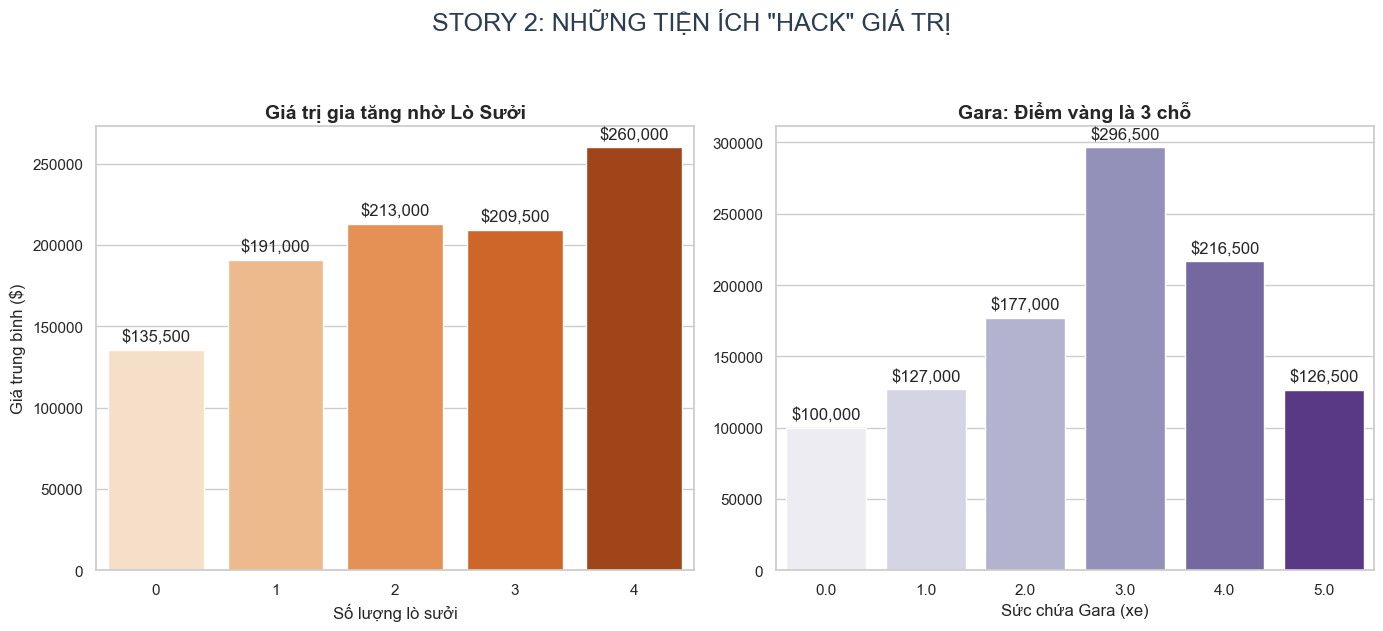

/var/folders/dm/fk87zbb17nzb594pksfvrc4c0000gn/T/ipykernel_17828/577511108.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=combined_nbhd.index, y=combined_nbhd.values, palette=colors)


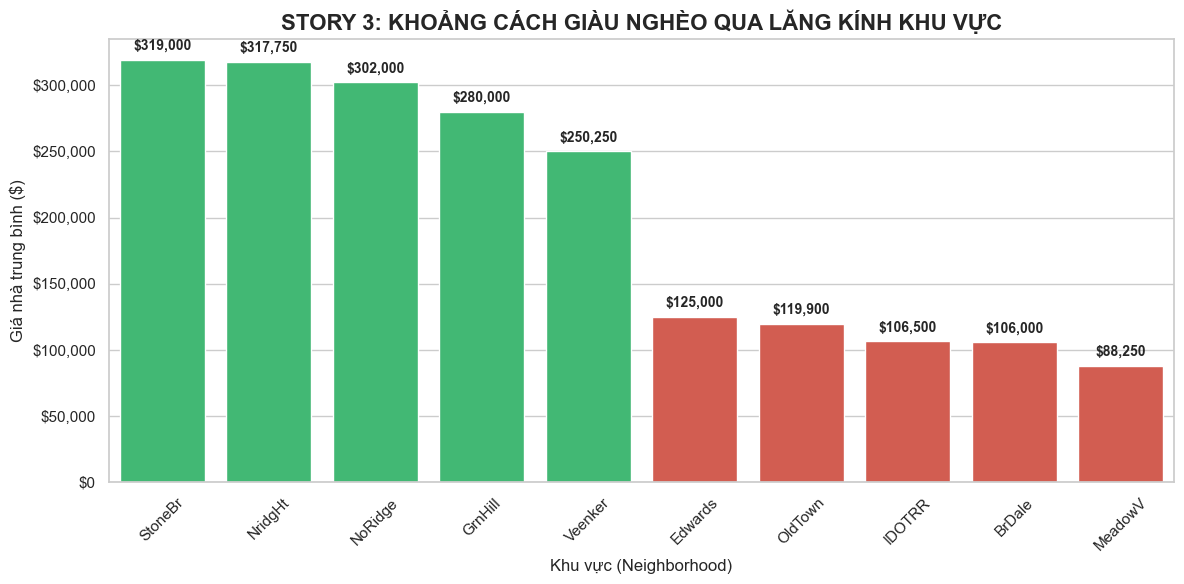

In [25]:
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'sans-serif' 
# ==============================================================================
# STORY 1: CHẤT LƯỢNG (QUALITY) VS KÍCH THƯỚC (SIZE)
# ==============================================================================
plt.figure(figsize=(14, 6))

# Biểu đồ 1: Diện tích vs Giá
plt.subplot(1, 2, 1)
sns.regplot(x='Gr Liv Area', y='SalePrice', data=df_insight, 
            scatter_kws={'alpha':0.3, 'color':'gray'}, line_kws={'color':'red'})
plt.title(f'Kích Thước vs Giá Nhà\n(Correlation: {df_insight["Gr Liv Area"].corr(df_insight["SalePrice"]):.2f})', fontsize=14, fontweight='bold')
plt.xlabel('Diện tích sống (sqft)')
plt.ylabel('Giá bán ($)')

# Biểu đồ 2: Chất lượng vs Giá
plt.subplot(1, 2, 2)
# Vì Overall Qual là biến rời rạc, ta dùng Boxplot để thấy rõ phân phối
sns.boxplot(x='Overall Qual', y='SalePrice', data=df_insight, palette="Blues")
plt.title(f'Chất Lượng vs Giá Nhà\n(Correlation: {df_insight["Overall Qual"].corr(df_insight["SalePrice"]):.2f})', fontsize=14, fontweight='bold')
plt.xlabel('Điểm chất lượng tổng thể (1-10)')
plt.ylabel('')
plt.suptitle('STORY 1: "TỐT GỖ HƠN TỐT NƯỚC SƠN"', fontsize=18, color='#2c3e50', y=1.05)
plt.tight_layout()
plt.show()


# ==============================================================================
# STORY 2: SỨC MẠNH CỦA TIỆN ÍCH (LÒ SƯỞI & GARA)
# ==============================================================================
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Lò sưởi
sns.barplot(x='Fireplaces', y='SalePrice', data=df_insight, estimator=np.median, errorbar=None, palette="Oranges", ax=axes[0])
axes[0].set_title('Giá trị gia tăng nhờ Lò Sưởi', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Giá trung bình ($)')
axes[0].set_xlabel('Số lượng lò sưởi')
# Thêm nhãn giá tiền
for p in axes[0].patches:
    axes[0].annotate(f'${int(p.get_height()):,}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Gara
sns.barplot(x='Garage Cars', y='SalePrice', data=df_insight, estimator=np.median, errorbar=None, palette="Purples", ax=axes[1])
axes[1].set_title('Gara: Điểm vàng là 3 chỗ', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')
axes[1].set_xlabel('Sức chứa Gara (xe)')
# Thêm nhãn giá tiền
for p in axes[1].patches:
    if p.get_height() > 0: # Tránh lỗi cột rỗng
        axes[1].annotate(f'${int(p.get_height()):,}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.suptitle('STORY 2: NHỮNG TIỆN ÍCH "HACK" GIÁ TRỊ', fontsize=18, color='#2c3e50', y=1.05)
plt.tight_layout()
plt.show()


# ==============================================================================
# STORY 3: BẤT BÌNH ĐẲNG KHU VỰC (TOP 5 VS BOTTOM 5)
# ==============================================================================
# Tính toán dữ liệu
nbhd_stats = df_insight.groupby('Neighborhood')['SalePrice'].median().sort_values(ascending=False)
top_5 = nbhd_stats.head(5)
bottom_5 = nbhd_stats.tail(5)
combined_nbhd = pd.concat([top_5, bottom_5])

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
colors = ['#2ecc71']*5 + ['#e74c3c']*5 # 5 màu xanh cho top, 5 màu đỏ cho bottom
ax = sns.barplot(x=combined_nbhd.index, y=combined_nbhd.values, palette=colors)

plt.title('STORY 3: KHOẢNG CÁCH GIÀU NGHÈO QUA LĂNG KÍNH KHU VỰC', fontsize=16, fontweight='bold')
plt.ylabel('Giá nhà trung bình ($)')
plt.xlabel('Khu vực (Neighborhood)')
plt.xticks(rotation=45)

# Thêm nhãn giá tiền
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

for p in ax.patches:
    ax.annotate(f'${int(p.get_height()):,}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points',
                fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()